# Basic dataset generation

In [1]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline  
print ("Package loaded") 
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Package loaded
Current folder is /home/jwserver/문서/Files/shape_classification


In [2]:
# Training set folder
paths = {
    "shapes/circle",
    "shapes/square",
    "shapes/star",
    "shapes/triangle"
}
categories = ['circle', 'square', 'star', 'triangle']

# The reshape size
img_size = [64, 64]
# Grayscale
use_gray = 0
# Save name
data_name = "shape_images"

print("Your images should be at")
for i, path in enumerate(paths):
    print(" [%d/%d] %s/%s" % (i, len(paths), cwd, path))
    
if use_gray:
    print("Data will be saved to %s" % (cwd + '/data/' + data_name + '_gray.npz'))
else:
    print("Data will be saved to %s" % (cwd + '/data/' + data_name + '_rgb.npz'))

Your images should be at
 [0/4] /home/jwserver/문서/Files/shape_classification/shapes/triangle
 [1/4] /home/jwserver/문서/Files/shape_classification/shapes/star
 [2/4] /home/jwserver/문서/Files/shape_classification/shapes/circle
 [3/4] /home/jwserver/문서/Files/shape_classification/shapes/square
Data will be saved to /home/jwserver/문서/Files/shape_classification/data/shape_images.npz


## RGB 2 GRAY Function

In [3]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,3], [0.299, 0.587, 0.114])
    else:
        # print("Furrent Image is GRAY!")
        return rgb

## Load Images

In [4]:
nclass = len(paths)
valid_exts = [".jpg", ".gif", ".png", ".tga", ".jpeg"]
imgcnt = 0

for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        curr_img = imread(fullpath)
        
        # Convert to grayscale
        if use_gray:
            gray_img = rgb2gray(curr_img)
        else:
            gray_img = curr_img
            
        # Reshape
        graysmall = imresize(gray_img, [img_size[0], img_size[1]]) / 255.
        grayvec = np.reshape(graysmall, (1, -1))
        
        # Save
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            total_img = grayvec
            total_label = curr_label
        else:
            total_img = np.concatenate((total_img, grayvec), axis=0)
            total_label = np.concatenate((total_label, curr_label), axis=0)
        imgcnt = imgcnt + 1
        if imgcnt % 1000 == 0 and imgcnt != 0:
            print("%d images processed." % imgcnt)
        
print("Total %d images loaded." % (imgcnt))

/home/jwserver/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/home/jwserver/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


1000 images processed.
2000 images processed.
3000 images processed.
4000 images processed.
5000 images processed.
6000 images processed.
7000 images processed.
8000 images processed.
9000 images processed.
10000 images processed.
11000 images processed.
12000 images processed.
13000 images processed.
14000 images processed.
Total 14970 images loaded.


## Divide Total Data into Training and Test set

In [5]:
def print_shape(string, x):
    print("Shape of '%s' is %s" % (string, x.shape, ))
    
randidx = np.random.randint(imgcnt, size=imgcnt)
trainidx = randidx[0: int(3*imgcnt/5)]    # 0 ~ 60%
testidx = randidx[int(3*imgcnt/5):imgcnt]    # 60% ~ 100%
trainimg = total_img[trainidx, :]
trainlabel = total_label[trainidx, :]
testimg = total_img[testidx, :]
testlabel = total_label[testidx, :]

print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of 'trainimg' is (8982, 4096)
Shape of 'trainlabel' is (8982, 4)
Shape of 'testimg' is (5988, 4096)
Shape of 'testlabel' is (5988, 4)


## Save to NPZ

In [6]:
if use_gray:
    savepath = cwd + "/data/" + data_name + "_gray.npz"
else:
    savepath = cwd + "/data/" + data_name + "_rgb.npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel,
         testimg=testimg, testlabel=testlabel,
         imgsize=img_size,
         use_gray=use_gray,
         categories=categories
        )
print("Saved to %s" % (savepath))

Saved to /home/jwserver/문서/Files/shape_classification/data/shape_images_rgb.npz


## Load dataset!

In [8]:
# Load images...
cwd = os.getcwd()
if use_gray:
    loadpath = cwd + "/data/" + data_name + "_gray.npz"
else:
    loadpath = cwd + "/data/" + data_name + "_rgb.npz"
shapes = np.load(loadpath)

# See what's in here
shapes.files

# Parse data
train_data = shapes['trainimg']
train_label = shapes['trainlabel']
test_data = shapes['testimg']
test_label = shapes['testlabel']
imgsize = shapes['imgsize']
categories = shapes['categories']
use_gray = shapes['use_gray']

if use_gray:
    img_channel = 1
else:
    img_channel = 3

print("%d train images loaded" % (train_data.shape[0]))
print("%d train labels loaded" % (train_label.shape[0]))
print("%d test images loaded" % (test_data.shape[0]))
print("%d test labels loaded" % (test_label.shape[0]))
print("%d train classes" % (train_label.shape[1]))
print("%d test classes" % (test_label.shape[1]))
print("%d train dimensions" % train_data.shape[1])
print("%d test dimensions" % test_data.shape[1])
print(imgsize)
print(categories)
print("Loaded from to %s" % (savepath))

8982 train images loaded
8982 train labels loaded
5988 test images loaded
5988 test labels loaded
4 train classes
4 test classes
4096 train dimensions
4096 test dimensions
[64 64]
['circle' 'square' 'star' 'triangle']
Loaded from to /home/jwserver/문서/Files/shape_classification/data/shape_images_rgb.npz


## Plot randomly selected Train images

IMAGE IS NOT RGB! Load GRAYSCALE instead.


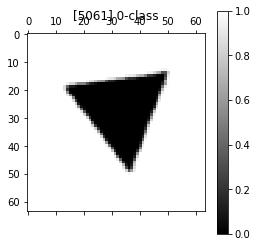

IMAGE IS NOT RGB! Load GRAYSCALE instead.


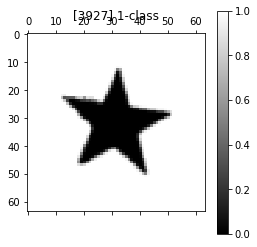

IMAGE IS NOT RGB! Load GRAYSCALE instead.


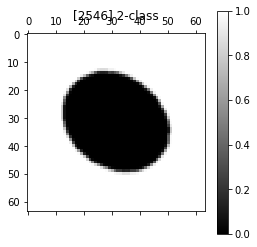

IMAGE IS NOT RGB! Load GRAYSCALE instead.


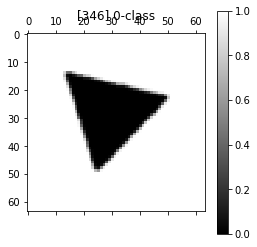

IMAGE IS NOT RGB! Load GRAYSCALE instead.


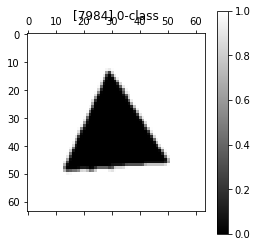

IMAGE IS NOT RGB! Load GRAYSCALE instead.


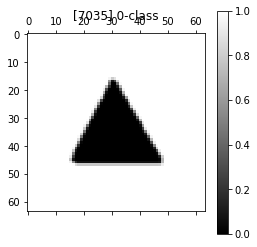

IMAGE IS NOT RGB! Load GRAYSCALE instead.


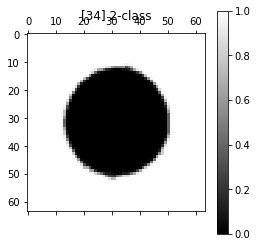

IMAGE IS NOT RGB! Load GRAYSCALE instead.


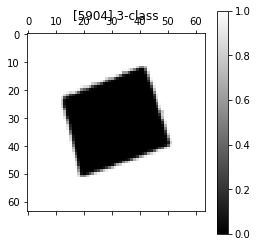

IMAGE IS NOT RGB! Load GRAYSCALE instead.


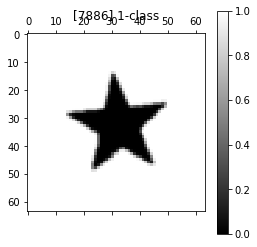

IMAGE IS NOT RGB! Load GRAYSCALE instead.


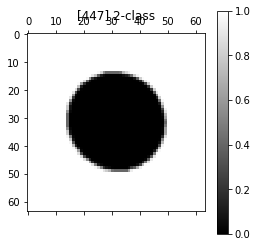

In [18]:
ntrain_loaded = train_data.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)

for i in randidx:
    curr_img = np.reshape(train_data[i, :], (img_size[0], -1))
    currlabel_onehot = train_label[i, :]
    curr_label = np.argmax(currlabel_onehot)
    
    if use_gray:
        try:
            curr_img = np.reshape(train_data[i, :], (img_size[0], -1))
            plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
            plt.colorbar()
        except:
            print("IMAGE IS NOT GRAYSCALE! Load RGB instead.")
            curr_img = np.reshape(train_data[i, :], (img_size[0], img_size[1], 3))
            plt.imshow(curr_img)
    else:
        try:
            curr_img = np.reshape(train_data[i, :], (img_size[0], img_size[1], 3))
            plt.imshow(curr_img)
        except:
            print("IMAGE IS NOT RGB! Load GRAYSCALE instead.")
            curr_img = np.reshape(train_data[i, :], (img_size[0], -1))
            plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
            plt.colorbar()
        
    title_string = "[%d] %d-class" % (i, curr_label)
    plt.title(title_string)
    plt.show()

## Plot randomly selected Test images

IMAGE IS NOT RGB! Load GRAYSCALE instead.


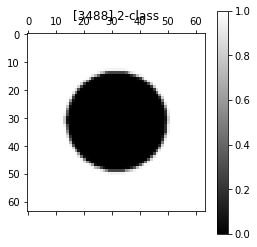

IMAGE IS NOT RGB! Load GRAYSCALE instead.


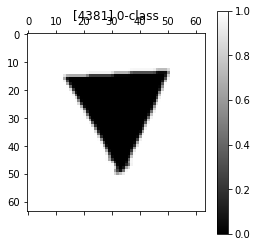

IMAGE IS NOT RGB! Load GRAYSCALE instead.


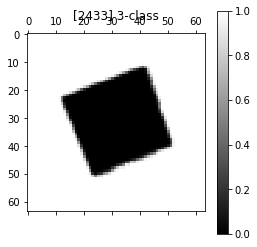

In [19]:
# Do batch stuff using loaded data
ntest_loaded = test_data.shape[0]
batch_size = 3;
randidx = np.random.randint(ntest_loaded, size=batch_size)

for i in randidx:
    curr_img = np.reshape(test_data[i, :], (img_size[0], -1))
    currlabel_onehot = test_label[i, :]
    curr_label = np.argmax(currlabel_onehot)
    
    if use_gray:
        try:
            curr_img = np.reshape(test_data[i, :], (img_size[0], -1))
            plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
            plt.colorbar()
        except:
            print("IMAGE IS NOT GRAYSCALE! Load RGB instead.")
            curr_img = np.reshape(test_data[i, :], (img_size[0], img_size[1], 3))
            plt.imshow(curr_img)
    else:
        try:
            curr_img = np.reshape(test_data[i, :], (img_size[0], img_size[1], 3))
            plt.imshow(curr_img)
        except:
            print("IMAGE IS NOT RGB! Load GRAYSCALE instead.")
            curr_img = np.reshape(test_data[i, :], (img_size[0], -1))
            plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
            plt.colorbar()
        
    title_string = "[%d] %d-class" % (i, curr_label)
    plt.title(title_string)
    plt.show()